In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM , Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [48]:
X = [[[(3**i)+j] for i in range (5)] for j in range(100)]
print (X)
Y = [(243+3*i) for i in range(100)]
print (Y)

[[[1], [3], [9], [27], [81]], [[2], [4], [10], [28], [82]], [[3], [5], [11], [29], [83]], [[4], [6], [12], [30], [84]], [[5], [7], [13], [31], [85]], [[6], [8], [14], [32], [86]], [[7], [9], [15], [33], [87]], [[8], [10], [16], [34], [88]], [[9], [11], [17], [35], [89]], [[10], [12], [18], [36], [90]], [[11], [13], [19], [37], [91]], [[12], [14], [20], [38], [92]], [[13], [15], [21], [39], [93]], [[14], [16], [22], [40], [94]], [[15], [17], [23], [41], [95]], [[16], [18], [24], [42], [96]], [[17], [19], [25], [43], [97]], [[18], [20], [26], [44], [98]], [[19], [21], [27], [45], [99]], [[20], [22], [28], [46], [100]], [[21], [23], [29], [47], [101]], [[22], [24], [30], [48], [102]], [[23], [25], [31], [49], [103]], [[24], [26], [32], [50], [104]], [[25], [27], [33], [51], [105]], [[26], [28], [34], [52], [106]], [[27], [29], [35], [53], [107]], [[28], [30], [36], [54], [108]], [[29], [31], [37], [55], [109]], [[30], [32], [38], [56], [110]], [[31], [33], [39], [57], [111]], [[32], [34],

In [0]:
X = np.array(X, dtype="float32")
Y = np.array(Y, dtype="float32")

In [0]:
X /= 500
Y /= 500

In [51]:
X.shape

(100, 5, 1)

In [52]:
Y.shape

(100,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, 
                                                random_state=5)

In [54]:
X_train

array([[[0.19 ],
        [0.194],
        [0.206],
        [0.242],
        [0.35 ]],

       [[0.114],
        [0.118],
        [0.13 ],
        [0.166],
        [0.274]],

       [[0.046],
        [0.05 ],
        [0.062],
        [0.098],
        [0.206]],

       [[0.08 ],
        [0.084],
        [0.096],
        [0.132],
        [0.24 ]],

       [[0.05 ],
        [0.054],
        [0.066],
        [0.102],
        [0.21 ]],

       [[0.028],
        [0.032],
        [0.044],
        [0.08 ],
        [0.188]],

       [[0.128],
        [0.132],
        [0.144],
        [0.18 ],
        [0.288]],

       [[0.144],
        [0.148],
        [0.16 ],
        [0.196],
        [0.304]],

       [[0.112],
        [0.116],
        [0.128],
        [0.164],
        [0.272]],

       [[0.176],
        [0.18 ],
        [0.192],
        [0.228],
        [0.336]],

       [[0.014],
        [0.018],
        [0.03 ],
        [0.066],
        [0.174]],

       [[0.178],
        [0.182],
        [

In [0]:
from keras.layers import SimpleRNN,LSTM,Flatten
model = Sequential()
model.add(LSTM((2),input_shape=(5,1),return_sequences=True))
model.add(LSTM((3),input_shape=(5,1),return_sequences=True))
model.add(Flatten())
model.add(Dense(1,activation='relu'))
#model.compile(optimizer='adam',loss='mae',metrics=['acc'])
model.compile(optimizer='adam',loss='mae',metrics=['acc'])

In [56]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 5, 2)              32        
_________________________________________________________________
lstm_10 (LSTM)               (None, 5, 3)              72        
_________________________________________________________________
flatten_2 (Flatten)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [57]:
hist = model.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test))

Train on 80 samples, validate on 20 samples
Epoch 1/1000
80/80 [==============================] - 2s 25ms/step - loss: 0.7847 - acc: 0.0000e+00 - val_loss: 0.7356 - val_acc: 0.0000e+00
Epoch 2/1000
80/80 [==============================] - 0s 315us/step - loss: 0.7798 - acc: 0.0000e+00 - val_loss: 0.7307 - val_acc: 0.0000e+00
Epoch 3/1000
80/80 [==============================] - 0s 239us/step - loss: 0.7748 - acc: 0.0000e+00 - val_loss: 0.7257 - val_acc: 0.0000e+00
Epoch 4/1000
80/80 [==============================] - 0s 238us/step - loss: 0.7697 - acc: 0.0000e+00 - val_loss: 0.7205 - val_acc: 0.0000e+00
Epoch 5/1000
80/80 [==============================] - 0s 257us/step - loss: 0.7645 - acc: 0.0000e+00 - val_loss: 0.7152 - val_acc: 0.0000e+00
Epoch 6/1000
80/80 [==============================] - 0s 253us/step - loss: 0.7592 - acc: 0.0000e+00 - val_loss: 0.7098 - val_acc: 0.0000e+00
Epoch 7/1000
80/80 [==============================] - 0s 280us/step - loss: 0.7537 - acc: 0.0000e+00 - va

In [0]:
y_predict = model.predict(X_test)

In [59]:
np.round(y_predict*500)

array([[442.],
       [339.],
       [382.],
       [327.],
       [466.],
       [312.],
       [274.],
       [303.],
       [294.],
       [348.],
       [533.],
       [354.],
       [454.],
       [363.],
       [424.],
       [345.],
       [369.],
       [415.],
       [280.],
       [451.]], dtype=float32)

In [60]:
np.round(y_test*500)

array([441., 339., 381., 327., 465., 312., 273., 303., 294., 348., 534.,
       354., 453., 363., 423., 345., 369., 414., 279., 450.],
      dtype=float32)

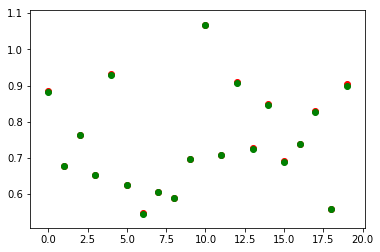

In [61]:
plt.scatter(range(20),y_predict,c = 'r')
plt.scatter(range(20),y_test ,c='g')
plt.show()

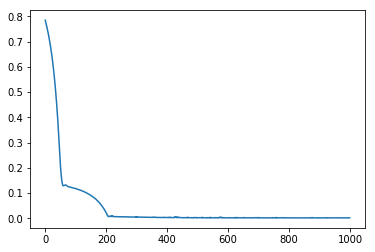

In [62]:
plt.plot(hist.history['loss'])
plt.show()